In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense, LSTM

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# import all from /processed data/
X = np.load(os.getcwd() + '/processed_data/proc_X.npy', allow_pickle=True)
y = np.load(os.getcwd() + '/processed_data/proc_y.npy', allow_pickle=True)
y = LabelEncoder().fit_transform(y)

In [3]:
def create_rnn_model():
    rnn_model = tf.keras.Sequential()
    rnn_model.add(InputLayer(input_shape=(X.shape[1], X.shape[2])))
    rnn_model.add(LSTM(units=64, activation='relu'))
    rnn_model.add(Dense(units=32, activation='relu'))
    #rnn_model.add(LSTM(units=32, activation='relu', dropout=0.25))
    rnn_model.add(Dense(len(np.unique(y)), activation='softmax'))
    rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return rnn_model

In [4]:
model = create_rnn_model()
best_model = None

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-12-01 14:30:39.774862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-01 14:30:39.774948: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Do K-fold cross validation
kf = KFold(n_splits=3, shuffle=False)
train_fold_accuracies = []
test_fold_accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))
    accuracy = model.evaluate(X_test, y_test)
    if all(accuracy[0] > acc for acc in test_fold_accuracies):
        best_model = model
    test_fold_accuracies.append(accuracy[1])
    train_fold_accuracies.append(model.evaluate(X_train, y_train)[1])

2021-12-01 14:30:40.153144: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-01 14:30:40.153546: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2021-12-01 14:30:40.426022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - ETA: 0s - loss: 3.0232 - accuracy: 0.2270

2021-12-01 14:31:06.538871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 28s 360ms/step - loss: 3.0232 - accuracy: 0.2270 - val_loss: 2.7505 - val_accuracy: 0.3044
Epoch 2/20
75/75 [==============================] - 27s 366ms/step - loss: 2.2066 - accuracy: 0.4380 - val_loss: 2.3133 - val_accuracy: 0.4016
Epoch 3/20
75/75 [==============================] - 28s 370ms/step - loss: 1.7189 - accuracy: 0.5457 - val_loss: 1.9869 - val_accuracy: 0.5121
Epoch 4/20
75/75 [==============================] - 27s 364ms/step - loss: 1.5564 - accuracy: 0.5632 - val_loss: 1.9287 - val_accuracy: 0.5263
Epoch 5/20
75/75 [==============================] - 27s 356ms/step - loss: 1.5474 - accuracy: 0.5707 - val_loss: 1.9569 - val_accuracy: 0.4967
Epoch 6/20
75/75 [==============================] - 27s 355ms/step - loss: 1.4750 - accuracy: 0.5811 - val_loss: 1.9002 - val_accuracy: 0.5254
Epoch 7/20
75/75 [==============================] - 27s 360ms/step - loss: 1.4406 - accuracy: 0.5903 - val_loss: 1.9507 - val_accuracy: 0.5154
Epoch 8/20

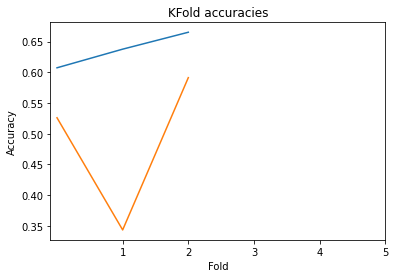

In [6]:
plt.plot(train_fold_accuracies)
plt.plot(test_fold_accuracies)
plt.xticks(range(1,6))
plt.title('KFold accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

In [7]:
# save model to /models/
best_model.save(os.getcwd() + '/models/best_model.h5')